In [1]:
import pandas as pd
import pickle

path2 = "/Users/amaros/Desktop/mgss2/log_norm.pkl"

with open(path2, 'rb') as file:
        metabolomics = pickle.load(file)       

mgcsts_samples_df = pd.read_csv("../Data/mgCSTs.samples.df.csv")
color_mgCST = pd.read_csv("../Data/mgCST_sort_color.csv")

minclustersize = 10
deepsplit = 4

mgcsts_samples = mgcsts_samples_df[(mgcsts_samples_df['minClusterSize'] == minclustersize) & (mgcsts_samples_df['deepSplit'] == deepsplit)]
color_mgCST = color_mgCST[(color_mgCST['minClusterSize'] == minclustersize) & (color_mgCST['deepSplit'] == deepsplit)]

In [22]:
GroupA = (1,8)
GroupB = (11,19)

def data_pca(m1,m2):
    df1 = mgcsts_samples[mgcsts_samples['mgCST'].isin(range(m1[0],m1[1]+1))]
    df1.loc[:,'label'] = "GroupA"
    df2 = mgcsts_samples[mgcsts_samples['mgCST'].isin(range(m2[0],m2[1]+1))]
    df2.loc[:,'label'] = "GroupB"
    df3 = pd.concat([df1,df2], axis = 0)
    data1 = pd.merge(df3, metabolomics, on = "sampleID", how = "inner")
    return data1

data1 = data_pca(GroupA, GroupB)
mgCSTs = data1['mgCST']
sampleID = data1['sampleID']
groups = data1['label']
data1 = data1.drop(['dtc','domTaxa','relabund','minClusterSize','deepSplit', 'sampleID', 'mgCST', 'label'], axis = 1)
new_colors = color_mgCST[color_mgCST['mgCST'].isin(mgCSTs)]


/var/folders/h5/ld8fm2tx5hx6b_hqkmxxbx_00000gp/T/ipykernel_7482/2032877990.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/h5/ld8fm2tx5hx6b_hqkmxxbx_00000gp/T/ipykernel_7482/2032877990.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=6)
principal_components = pca.fit_transform(data1)
explained_variance = pca.explained_variance_ratio_
components_compo = pca.components_

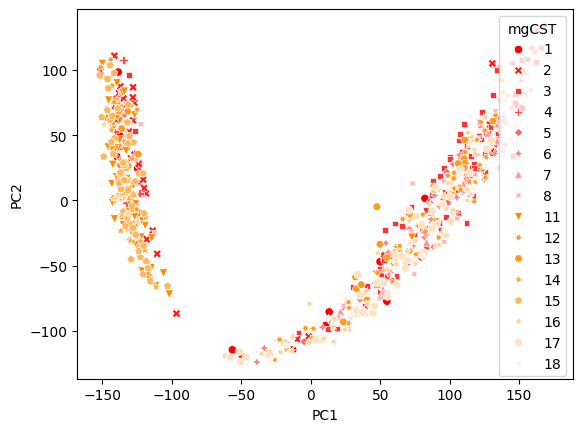

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

pca_df = pd.DataFrame(data = principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pca_df = pd.concat([pca_df, mgCSTs, sampleID], axis=1)
pca_df = pca_df.sort_values(by='mgCST', ascending=True)
new_legend = new_colors['color_mgCST'].apply(lambda x : mcolors.to_rgba(x)).values
pca_df['mgCST'] = pca_df['mgCST'].astype(str)
sns.scatterplot(pca_df, x='PC1', y='PC2', hue='mgCST', style='mgCST', palette=list(new_legend));

In [25]:
import plotly.express as px
new_legend = new_colors['color_mgCST']#.apply(lambda x : mcolors.to_rgba(x)).values

fig = px.scatter(pca_df, x='PC1', y='PC2', color='mgCST', symbol='mgCST',color_discrete_sequence=new_legend.values)
fig.show()

In [1]:
# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color = 'mgCST', symbol='mgCST', color_discrete_sequence=new_legend.values)

fig.update_layout(scene=dict(xaxis_title='PC 1',
                             yaxis_title='PC 2',
                             zaxis_title='PC 3'))

fig.update_traces(marker=dict(size=2,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

NameError: name 'px' is not defined

In [214]:
# Principal Components Loadings (original features composition)
features_names = data1.columns
principal_components_loadings = pd.DataFrame(pca.components_, columns=features_names)
principal_components_loadings

,lactate:phosphate,leucine:phosphate,glutamate:phosphate,isoleucine:phosphate,choline:phosphate,phenylalanine:phosphate,proline:phosphate,creatine:phosphate,alanine:phosphate,arginine:phosphate,...,paroxetine:ibuprofen acyl glucuronide,gabapentin:ibuprofen acyl glucuronide,gabapentin:paroxetine,glucuronide of C12H22O4 (2)*:sulforaphane-N-acetyl-cysteine,X-24736:sulforaphane-N-acetyl-cysteine,X-24736:glucuronide of C12H22O4 (2)*,venlafaxine:O-desmethylvenlafaxine,N-desmethyl tramadol:tramadol,O-desmethyltramadol:tramadol,O-desmethyltramadol:N-desmethyl tramadol
0,-0.007953,-0.007763,-0.009584,-0.007682,-0.007872,-0.008160,-0.009030,-0.010778,-0.008891,-0.008390,...,-0.000022,-0.000028,-0.000010,-0.0,-0.0,-0.0,-0.000010,-0.0,-0.0,-0.0
1,-0.012409,-0.012062,-0.011613,-0.011513,-0.005213,-0.013392,-0.008128,-0.010750,-0.007901,-0.015727,...,-0.000102,-0.000127,-0.000037,-0.0,-0.0,-0.0,-0.000044,-0.0,-0.0,-0.0
2,0.006267,0.007441,0.007511,0.007507,0.006170,0.006381,0.006930,0.006732,0.007427,0.005088,...,0.000011,0.000014,0.000006,0.0,0.0,0.0,0.000010,0.0,0.0,0.0
3,-0.000778,-0.002773,-0.001180,-0.002607,-0.000486,-0.001650,-0.000951,0.000563,-0.001078,0.000838,...,-0.000087,-0.000109,-0.000038,-0.0,-0.0,-0.0,-0.000059,-0.0,-0.0,-0.0
4,-0.001253,-0.002080,-0.001420,-0.003023,-0.000775,-0.001802,-0.000342,-0.001234,-0.002076,-0.001434,...,0.000122,0.000152,0.000042,-0.0,-0.0,-0.0,0.000047,-0.0,-0.0,-0.0
5,-0.001078,-0.004843,-0.002833,-0.005616,0.001536,-0.002592,-0.001815,-0.000320,-0.003166,-0.002613,...,0.000002,0.000003,-0.000004,-0.0,-0.0,-0.0,-0.000006,-0.0,-0.0,-0.0


In [327]:
def get_features(pc, n) :

        '''For a given principal component, this function returns the n most contributing features (positive & negative correlation) from principal_components_loadings dataset.
        Results are stored in a dataframe with composed of feature name, explained_variance associated, principal component desired and feature rank'''

        df_pos = pd.DataFrame(principal_components_loadings.iloc[pc,:].sort_values(ascending=False)[:n]).reset_index().rename(columns={'index':'Features', pc:'Explained_variance'})
        df_pos['PCs'] = 'PC'+str(pc+1)
        df_pos['Feature_rank'] = [i+1 for i in range(n)]

        df_neg = pd.DataFrame(principal_components_loadings.iloc[pc,:].sort_values(ascending=False)[-n:]).reset_index().rename(columns={'index':'Features', pc:'Explained_variance'})
        df_neg['PCs'] = 'PC'+str(pc+1)
        df_neg['Feature_rank'] = sorted([i+1 for i in range(n)],reverse=True)

        return df_pos, df_neg

In [328]:
get_features(0,5)[0]

,Features,Explained_variance,PCs,Feature_rank
0,1-carboxyethylvaline:stearate (18:0),0.012596,PC1,1
1,X - 22775:stearate (18:0),0.012387,PC1,2
2,pimaric acid:stearate (18:0),0.012355,PC1,3
3,1-carboxyethylphenylalanine:stearate (18:0),0.011932,PC1,4
4,X - 24077:stearate (18:0),0.011738,PC1,5


In [329]:
get_features(0,5)[1]

,Features,Explained_variance,PCs,Feature_rank
0,quinolinate:phosphate,-0.016838,PC1,5
1,histidine:phosphate,-0.016895,PC1,4
2,cytidine:phosphate,-0.018079,PC1,3
3,X-25047:phosphate,-0.018183,PC1,2
4,methionine:phosphate,-0.018220,PC1,1


In [330]:
# Store positive & negative correlation DataFrame into a list
top_pos = [get_features(i, 5)[0] for i in range(6)]
top_neg = [get_features(i, 5)[1] for i in range(6)]

# Concatenate all element of each list one after the other (vertical axis)
plotly_df_pos = pd.DataFrame()
for i in top_pos :
    plotly_df_pos = pd.concat([plotly_df_pos,i], axis=0)

plotly_df_neg = pd.DataFrame()
for i in top_neg :
    plotly_df_neg = pd.concat([plotly_df_neg, i], axis = 0)

In [331]:
plotly_df_pos['Feature_rank'] = plotly_df_pos['Feature_rank'].astype(str)

fig = px.bar(plotly_df_pos, x='PCs', y='Explained_variance', 
                     color='Feature_rank', text='Features', barmode='stack', 
                     labels={'PCs':'Principal Component'}, 
                     title='5 most contributing features - Positive correlation')
fig.show()

In [338]:
plotly_df_neg['Feature_rank'] = plotly_df_neg['Feature_rank'].astype(str)
# plotly_df_neg['Explained_variance'] = -1 * plotly_df_neg['Explained_variance']
# plotly_df_neg = plotly_df_neg.sort_values(by=['PCs','Explained_variance'], ascending=[True,False])
# plotly_df_neg = plotly_df_neg.sort_values(by='PCs', ascending=True)
# plotly_df_neg = plotly_df_neg.sort_values(by=['PCs', 'Explained_variance'])
fig = px.bar(plotly_df_neg, x='PCs', y='Explained_variance', 
             color='Feature_rank', text='Features', barmode='stack',
             labels={'PCs':'Principal Component',
                     'Explained_variance' : 'Explained_variance'}, 
             title='5 most contributing features - Negative correlation')
# Reverse the y-axis
# fig.update_layout(yaxis=dict(scaleanchor='x', scaleratio=1, autorange='reversed'))
      
fig.show(theme='streamlit')

In [307]:
plotly_df_neg.sort_values(by=['PCs','Explained_variance'], ascending=[True,False])

,Features,Explained_variance,PCs,Feature_rank
4,methionine:phosphate,0.018220,PC1,1
3,X-25047:phosphate,0.018183,PC1,2
2,cytidine:phosphate,0.018079,PC1,3
1,histidine:phosphate,0.016895,PC1,4
0,quinolinate:phosphate,0.016838,PC1,5
4,asparagine:putrescine,0.018326,PC2,1
3,asparagine:phosphate,0.018042,PC2,2
2,asparagine:deoxycarnitine,0.017794,PC2,3
1,glycerophosphorylcholine (GPC):N-acetylputrescine,0.015777,PC2,4
0,arginine:phosphate,0.015727,PC2,5


In [309]:
plotly_df_pos

,Features,Explained_variance,PCs,Feature_rank
0,1-carboxyethylvaline:stearate (18:0),0.012596,PC1,1
1,X - 22775:stearate (18:0),0.012387,PC1,2
2,pimaric acid:stearate (18:0),0.012355,PC1,3
3,1-carboxyethylphenylalanine:stearate (18:0),0.011932,PC1,4
4,X - 24077:stearate (18:0),0.011738,PC1,5
0,N-acetylputrescine:asparagine,0.018989,PC2,1
1,pipecolate:asparagine,0.018453,PC2,2
2,octanoylcarnitine (C8):lactate,0.017797,PC2,3
3,tyramine:asparagine,0.017084,PC2,4
4,octanoylcarnitine (C8):glutamate,0.016704,PC2,5
